# Forward kinematics and Workspace analysis of a delta robot:
I have tried to replicate the work done in a research paper here.

In [27]:
# IMPORTING ALL THAT'S NEEDED:
import numpy as np
import matplotlib.pyplot as plt
import math as m


### First we define the things we can control
That is we define the angles and the link lengths

In [28]:
#angles
theta_1=np.linspace(-(2*m.pi)/9, (4*m.pi)/9, 51)
theta_2=np.linspace(-(2*m.pi)/9, (4*m.pi)/9, 51)
theta_3=np.linspace(-(2*m.pi)/9, (4*m.pi)/9, 51)

np.random.shuffle(theta_1)
np.random.shuffle(theta_2)
np.random.shuffle(theta_3)

### Link Lengths:
R=205
L1=400
L2=1000
r=50

### Now we define the constants and the rotation matrices:

In [29]:
    ##Constants and relations:
### installation angles of the arms
alpha_1=0
alpha_2=2*m.pi/3
alpha_3= 4*m.pi/3

### rotation transformation matrix (R)
R1=np.array([
    [m.cos(alpha_1), -1*m.sin(alpha_1), 0],
    [m.sin(alpha_1), m.cos(alpha_1),0],
    [0,0,1]
])
R2=np.array([
    [m.cos(alpha_2), -1*m.sin(alpha_2), 0],
    [m.sin(alpha_2), m.cos(alpha_2),0],
    [0,0,1]
])
R3=np.array([
    [m.cos(alpha_3), -1*m.sin(alpha_3), 0],
    [m.sin(alpha_3), m.cos(alpha_3),0],
    [0,0,1]
])



### Linear equations and other expressions we'll need:


In [30]:
#### Some expressions after simplification of the constraints:
k11=(R-r) + L1*np.cos(theta_1)
k12=0
k13=(-1*L1)*np.sin(theta_1)

k21=0.5*((R-r) + L1*np.sin(theta_2))
k22=((-1*m.sqrt(3))/2)*((R-r) + L1*np.cos(theta_2))
k23=(-1*L1)*np.sin(theta_2)

k31=0.5*((R-r) + L1*np.sin(theta_3))
k32=((m.sqrt(3))/2)*((R-r) + L1*np.cos(theta_3))
k33=(-1*L1)*np.sin(theta_3)

# np.random.shuffle(k13)
# np.random.shuffle(k23)
# np.random.shuffle(k33)


a1=2*(k11-k21)
a2=2*(k11-k31)
b1=2*(k12-k22)
b2=2*(k12-k32)
c1=2*(k13-k23)
c2=2*(k13-k33)
d1=((k21)**2 + (k22)**2 + (k23)**2) - ((k11)**2 + (k12)**2 + (k13)**2)
d2=((k31)**2 + (k32)**2 + (k33)**2) - ((k11)**2 + (k12)**2 + (k13)**2)

delta=a1*b2 - a2*b1

#####Parameters:
f1=(b2*d1 - b1*d2)/(delta)
f2=(b1*c2 - b2*c1)/(delta)
fx=(b1*c2 - b2*c1)/(delta)
fy=(a2*c1 - a1*c2)/(delta)


### Solving the quadratic equation after framing it:

In [31]:
        #SOLVING:
#### QUADRATIC EQUATION: Az^2 + Bz + C=0
A=(1+fx**2 + fy**2)
B=2*( (fx*f1 + fx*k31) + (fx*f2 + fy*k32) + k33 )
C=((f1+k31)**2 + (f2+k32)**2 + k33**2 - L2**2)

numerator_quad=B**2 - 4*A*C
Z1=np.empty_like(theta_1)
Z2=np.empty_like(theta_1)        

np.append(Z1,(-B + np.sqrt(numerator_quad))/(2*A))
np.append(Z2,(-B - np.sqrt(numerator_quad))/(2*A))

Z_final=Z1

X=f1+fx*Z_final
Y=f2+fy*Z_final



### Putting everything in a Table:

In [32]:
import pandas as pd

results_table=pd.DataFrame(
    {
        'Theta_1': theta_1,
        'Theta_2': theta_2,
        'Theta_3': theta_3,
        'X':X,
        'Y': Y,
        'Z': Z_final
    },columns=['Theta_1','Theta_2','Theta_3','X','Y','Z']
)

In [33]:
results_table

,Theta_1,Theta_2,Theta_3,X,Y,Z
0,-0.446804,-0.153589,0.516617,-2.804869e+04,1.687682e+04,4.548825e+04
1,-0.279253,-0.321141,-0.363028,3.062610e+03,-1.159294e+03,6.921712e+04
2,0.390954,0.349066,-0.237365,2.282177e+02,-2.082079e+02,9.873921e+02
3,-0.404916,1.186824,0.642281,-2.723184e+06,-5.809489e+05,1.628568e+06
4,0.809833,0.642281,0.558505,3.380132e+04,-3.648739e+03,1.277456e+05
5,-0.069813,0.516617,1.270600,-1.112070e+06,4.340150e+05,1.024755e+06
6,0.223402,0.181514,0.851721,-7.037441e+04,7.173278e+04,2.274200e+05
7,-0.572468,0.558505,-0.321141,-1.866296e+04,-1.385770e+04,2.719662e+04
8,-0.656244,-0.656244,0.307178,-9.541862e+03,1.199279e+04,2.394310e+04
9,-0.153589,0.851721,1.019272,-1.505639e+06,1.157966e+05,1.224037e+06


In [34]:
results_table.shape

(51, 6)

In [35]:
# Trying to run it 51^3 times as instructed by the paper!

X_tot=np.empty_like((theta_1)*(theta_1)*theta_1)
Y_tot=np.empty_like((theta_1)*(theta_1)*theta_1)
Z_tot=np.empty_like((theta_1)*(theta_1)*theta_1)

for i in theta_1:
    for j in theta_2:
       for k in theta_3:
        #### Some expressions after simplification of the constraints:
        k11=(R-r) + L1*np.cos(theta_1)
        k12=0
        k13=(-1*L1)*np.sin(theta_1)

        k21=0.5*((R-r) + L1*np.sin(theta_2))
        k22=((-1*m.sqrt(3))/2)*((R-r) + L1*np.cos(theta_2))
        k23=(-1*L1)*np.sin(theta_2)

        k31=0.5*((R-r) + L1*np.sin(theta_3))
        k32=((m.sqrt(3))/2)*((R-r) + L1*np.cos(theta_3))
        k33=(-1*L1)*np.sin(theta_3)

        # np.random.shuffle(k13)
        # np.random.shuffle(k23)
        # np.random.shuffle(k33)


        a1=2*(k11-k21)
        a2=2*(k11-k31)
        b1=2*(k12-k22)
        b2=2*(k12-k32)
        c1=2*(k13-k23)
        c2=2*(k13-k33)
        d1=((k21)**2 + (k22)**2 + (k23)**2) - ((k11)**2 + (k12)**2 + (k13)**2)
        d2=((k31)**2 + (k32)**2 + (k33)**2) - ((k11)**2 + (k12)**2 + (k13)**2)

        delta=a1*b2 - a2*b1

        #####Parameters:
        f1=(b2*d1 - b1*d2)/(delta)
        f2=(b1*c2 - b2*c1)/(delta)
        fx=(b1*c2 - b2*c1)/(delta)
        fy=(a2*c1 - a1*c2)/(delta)

        A=(1+fx**2 + fy**2)
        B=2*( (fx*f1 + fx*k31) + (fx*f2 + fy*k32) + k33 )
        C=((f1+k31)**2 + (f2+k32)**2 + k33**2 - L2**2)
        numerator_quad=B**2 - 4*A*C
        Z1=np.empty_like(theta_1)
        Z2=np.empty_like(theta_1)

        np.append(Z1,(-B + np.sqrt(numerator_quad))/(2*A))
        np.append(Z2,(-B - np.sqrt(numerator_quad))/(2*A))

        Z_final=Z2

        np.append(Z_tot,Z_final)

        X=f1+fx*Z_final
        Y=f2+fy*Z_final

        np.append(X_tot,X)
        np.append(Y_tot,Y)


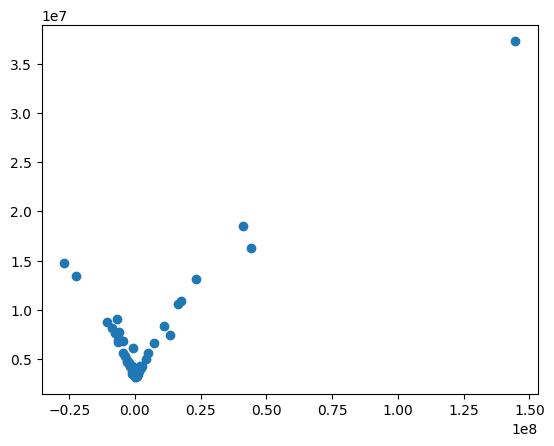

In [36]:
plt.scatter(X,Z_final)
plt.savefig('X vs Z')

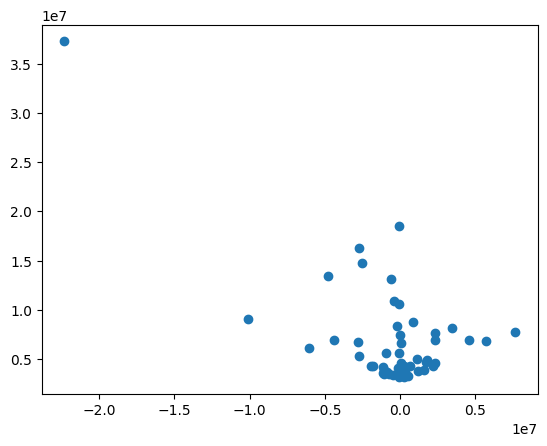

In [37]:
plt.scatter(Y,Z_final)
plt.savefig("Y vs Z")

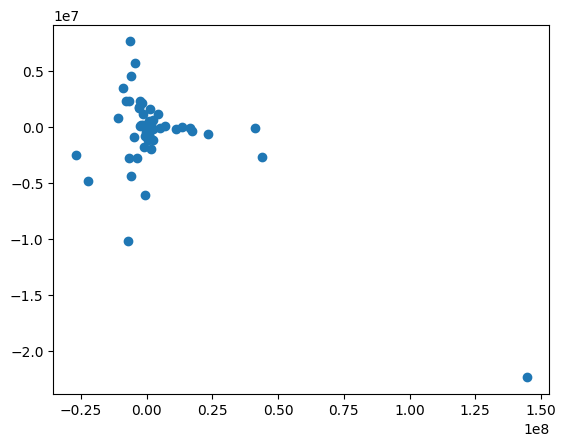

In [38]:
plt.scatter(X,Y)
plt.savefig('x vs Y')

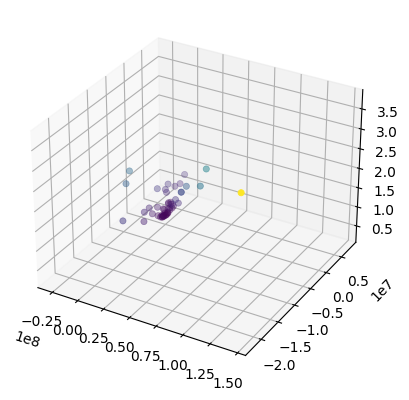

In [39]:
fig=plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z_final, c=Z_final, cmap='viridis', linewidth=0.5)
plt.savefig("3D plot ")